# HW1  Try out gradient descent

## Due Monday April 25th, 2022 at 11:59PM

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{25}\left(2w^3 + w + 5 \right)$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [17]:
# gradient descent function
# inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha,max_its,w0):
    
    # calculate cost of initial weight
    cost_history = [g(w0)]
    
    # calculate weight and cost for each iteration until we hit our max
    for k in range(1, max_its):
        
        # implement the update rule for weight k
        wk = w0 - (alpha * gd(w0))
        # calculate cost of new weight
        cost_history.append(g(wk))
        # update old weight
        w0 = wk
    
    # return cost history for each step
    return cost_history

# define the cost function
def g(w):
    return (1/50)*(w**4 + w**2 + 10*w - 50)

# define the partial derivative of the cost function
def gd(w):
    return (1/25)*(2*(w**3) + w + 5)

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


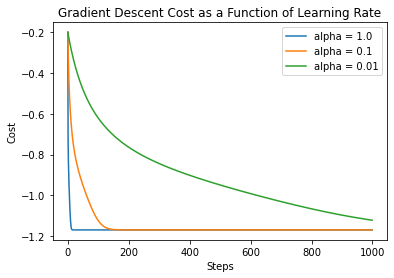

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

# constants
w0 = 2.0
max_its = 1000

# first Run
alpha = 1.0
r1_cost = gradient_descent(alpha, max_its, w0)

# second Run
alpha = 0.1
r2_cost = gradient_descent(alpha, max_its, w0)

# third Run
alpha = 0.01
r3_cost = gradient_descent(alpha, max_its, w0)

# plot each run
plt.plot(r1_cost, label="alpha = 1.0")
plt.plot(r2_cost, label="alpha = 0.1")
plt.plot(r3_cost, label="alpha = 0.01")
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Gradient Descent Cost as a Function of Learning Rate")
plt.legend()
plt.show()


For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, this function is convex because a line segment between any two points on its graph lies above or on the graph. Its global minimum is at point (0,0) where:

\begin{equation}
w = 0
\end{equation}
\begin{equation}
g(w) = 0
\end{equation}

5) [5 points] What is the derivative of the cost function?

\begin{equation}
\frac{\partial}{\partial w}g(w) = \frac{w}{|w|}
\end{equation}

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [19]:
from autograd import grad

# gradient descent function
# inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    
    # automatically calculate gradient using autograd
    gradient = grad(g)
    # save initial weight and calculate its cost
    weight_history, cost_history = [w0], [g(w0)]
    
    for k in range(1, max_its):
        
        # implement the update rule for weight k
        wk = w0 - (alpha * gradient(w0))
        # save new weight and calculate its cost
        cost_history.append(g(wk)), weight_history.append(wk)
        # update old weight
        w0 = wk
    
    return weight_history,cost_history

7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

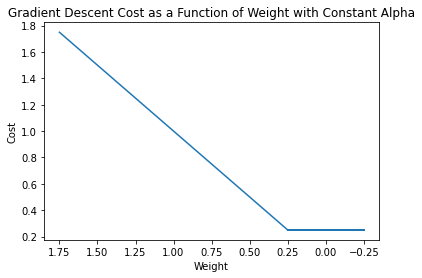

In [20]:
# define the cost function
def g(w):
    return abs(w)

# constants
max_its = 20
w0 = 1.75
alpha = 0.5

# calculate weight and cost history
weights, costs = gradient_descent(g, alpha, max_its, w0)

# plot cost as a function of weight
plt.plot(weights, costs)
# invert graph to show cost minimization
plt.gca().invert_xaxis()
plt.xlabel("Weight"), plt.ylabel("Cost"), plt.title("Gradient Descent Cost as a Function of Weight with Constant Alpha")
plt.show()

8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wiehgt history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

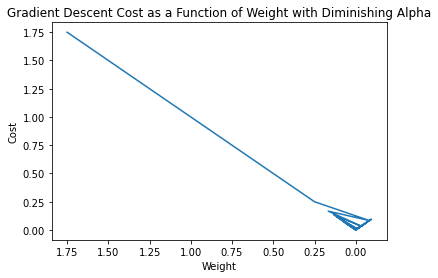

In [21]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    
    # automatically calculate gradient using autograd
    gradient = grad(g)
    # save initial weight and calculate its cost
    weight_history, cost_history = [w0], [g(w0)]
    
    # where we use a diminishing alpha of 1/k
    if alpha=='diminishing':
        
        for k in range(1, max_its):
        
            # implement the update rule for weight k
            wk = w0 - ((1/k) * gradient(w0))
            # save new weight and calculate its cost
            cost_history.append(g(wk)), weight_history.append(wk)
            # update old weight
            w0 = wk
    
    # where we use a constant alpha
    else:
        
        for k in range(1, max_its):
        
            # implement the update rule for weight k
            wk = w0 - (alpha * gradient(w0))
            # save new weight and calculate its cost
            cost_history.append(g(wk)), weight_history.append(wk)
            # update old weight
            w0 = wk
    
    return weight_history,cost_history

# constants
w0 = 1.75
max_its = 20
alpha = "diminishing"

# calculate weight and cost history
weights, costs = gradient_descent(g, alpha, max_its, w0)

# plot cost as a function of weight
plt.plot(weights, costs)
# invert graph to show cost minimization
plt.gca().invert_xaxis()
plt.xlabel("Weight"), plt.ylabel("Cost"), plt.title("Gradient Descent Cost as a Function of Weight with Diminishing Alpha")
plt.show()

9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

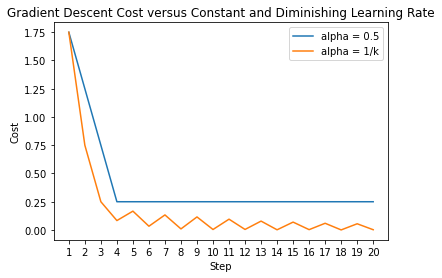

In [23]:
# get a list of step values between 1 and maximum number of iterations
steps = []
for step in range(1, max_its + 1):
    steps.append(step)
    
# constants
w0 = 1.75
max_its = 20

# get weight and cost history with constant alpha
alpha = 0.5
c_weights, c_costs = gradient_descent(g, alpha, max_its, w0)

# get weight and cost history with diminishing alpha
alpha = "diminishing"
d_weights, d_costs = gradient_descent(g, alpha, max_its, w0)

# plot cost relative to step number for constant and diminishing alphas
plt.plot(steps, c_costs, label="alpha = 0.5")
plt.plot(steps, d_costs, label="alpha = 1/k")
plt.xticks(steps)
plt.xlabel("Step"), plt.ylabel("Cost"), plt.title("Gradient Descent Cost versus Constant and Diminishing Learning Rate")
plt.legend()
plt.show()

Given the cost function g(w), a maximum step count of 20, and a starting weight of 1.75, a diminishing learning rate of 1/k works better than a constant learning rate equal to 0.5. As the plot above illustrates, a constant alpha of 0.5 does not allow us to get close enough to the minimum (0,0). In fact, the closest we can get to a cost of 0 is 0.25, otherwise with one more step we would overshoot the minimum. A diminishing alpha, on the other hand, allows us to slowly near the minimum, taking smaller steps the closer we get such that we can gradually approach (0,0).

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [24]:
import autograd.numpy as np
from autograd import grad

# define the cost function
def g(w):
    return w[0]**2 + w[1]**2 + 2 * np.sin(1.5 * (w[0] + w[1])) + 2

# gradient descent function
# inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    
    # automatically calculate gradient using autograd
    gradient = grad(g)
    # save initial weight and calculate its cost
    weight_history, cost_history = [w0], [g(w0)]
    
    for k in range(1, max_its):
        
        # initialize numpy array to hold weight values that comply with autograd
        new_weights = np.array([])

        # for each weight in the weight array
        for parameter in range(0, len(w0)):
            
            # implement the update rule for weight k
            weight = w0[parameter] - alpha * gradient(w0)
            # compile all new weights
            new_weights = np.append(new_weights, weight[0])

        # save new weights and calculate their cost
        cost_history.append(g(new_weights)), weight_history.append(new_weights)
        # update old weight
        w0 = new_weights
    
    return weight_history,cost_history
                                      

11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



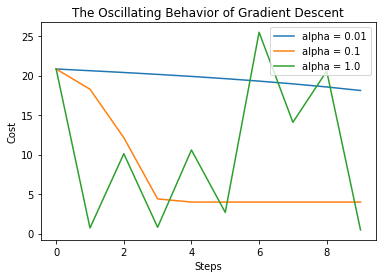

In [25]:
import autograd.numpy as np

# constants
w = np.array([3.0, 3.0])
max_its = 10

# first Run
alpha = 0.01
r1_weights, r1_cost = gradient_descent(g, alpha, max_its, w)

# second Run
alpha = 0.1
r2_weights, r2_cost = gradient_descent(g, alpha, max_its, w)

# third Run
alpha = 1.0
r3_weights, r3_cost = gradient_descent(g, alpha, max_its, w)

# plot the cost of each run with different learning rates
plt.plot(r1_cost, label="alpha = 0.01")
plt.plot(r2_cost, label="alpha = 0.1")
plt.plot(r3_cost, label="alpha = 1.0")
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("The Oscillating Behavior of Gradient Descent")
plt.legend()
plt.show()

An alpha of 1.0 leads to an oscillating behavior. This means that the learning rate is too large, causing the cost to fluctuate at each step and barring the gradient descent algorithm from reaching an appropriate minimum.

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

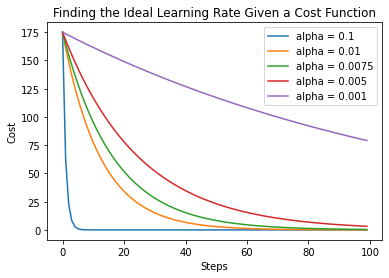

In [26]:
# define the cost function
def g(w):
    return 2 * w[0]**2 + w[1]**2 + 4 * w[2]**2

# constants
w = np.array([5.0, 5.0, 5.0])
max_its = 100

# first Run
alpha = 0.1
r1_weights, r1_cost = gradient_descent(g, alpha, max_its, w)

# second Run
alpha = 0.01
r2_weights, r2_cost = gradient_descent(g, alpha, max_its, w)

# third Run
alpha = 0.0075
r3_weights, r3_cost = gradient_descent(g, alpha, max_its, w)

# fourth Run
alpha = 0.005
r4_weights, r4_cost = gradient_descent(g, alpha, max_its, w)

# fifth Run
alpha = 0.001
r5_weights, r5_cost = gradient_descent(g, alpha, max_its, w)

# plot the cost of each run with different learning rates
plt.plot(r1_cost, label="alpha = 0.1")
plt.plot(r2_cost, label="alpha = 0.01")
plt.plot(r3_cost, label="alpha = 0.0075")
plt.plot(r4_cost, label="alpha = 0.005")
plt.plot(r5_cost, label="alpha = 0.001")
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Finding the Ideal Learning Rate Given a Cost Function")
plt.legend()
plt.show()

An alpha of 0.1 seems to converge the fastest, reaching its limit between 5 and 10 steps. The lower the learning rate gets beyond 0.1, the slower it converges.

# Bonus Question!

[10 points] This is an open-ended question. Can you find a way to speed up your gradient descent algorithm implemented above? Please provided the code below:

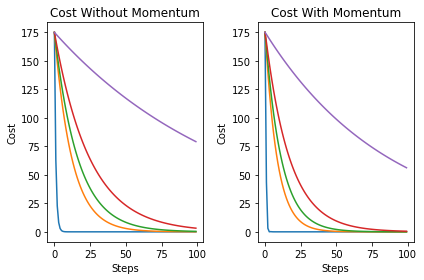

In [27]:
# changes to gradient descent algorithm are indicated with capitalized comments

import autograd.numpy as np
from autograd import grad

def g(w):
    return 2 * w[0]**2 + w[1]**2 + 4 * w[2]**2

def gradient_descent(g,alpha,max_its,w0,momentum):
    
    gradient = grad(g)
    weight_history, cost_history = [w0], [g(w0)]
    # SAVE THE CHANGE IN WEIGHT BETWEEN EACH ITERATION
    change = 0.0
    
    for k in range(1, max_its):
        
        new_weights = np.array([])

        for parameter in range(0, len(w0)):
            
            # CALCULATE DIFFERENCE BETWEEN OLD WEIGHT AND NEW WEIGHT WITH MOMENTUM
            # MOMENTUM IS PROPORTIONAL TO CHANGE IN WEIGHT
            new_change = alpha * gradient(w0) + momentum * change
            # CALCULATE NEW WEIGHT
            weight = w0[parameter] - new_change
            # UPDATE VARIABLE STORING CHANGE IN WEIGHT
            change = new_change
            new_weights = np.append(new_weights, weight[0])

        cost_history.append(g(new_weights)), weight_history.append(new_weights)
        w0 = new_weights
    
    return weight_history,cost_history

w = np.array([5.0, 5.0, 5.0])
max_its = 100
momentum = 0.3

alpha = 0.1
r1_weights_m, r1_cost_m = gradient_descent(g, alpha, max_its, w, momentum)

alpha = 0.01
r2_weights_m, r2_cost_m = gradient_descent(g, alpha, max_its, w, momentum)

alpha = 0.0075
r3_weights_m, r3_cost_m = gradient_descent(g, alpha, max_its, w, momentum)

alpha = 0.005
r4_weights_m, r4_cost_m = gradient_descent(g, alpha, max_its, w, momentum)

alpha = 0.001
r5_weights_m, r5_cost_m = gradient_descent(g, alpha, max_its, w, momentum)

plt.subplot(1, 2, 1)
plt.plot(r1_cost, label="alpha = 0.1")
plt.plot(r2_cost, label="alpha = 0.01")
plt.plot(r3_cost, label="alpha = 0.0075")
plt.plot(r4_cost, label="alpha = 0.005")
plt.plot(r5_cost, label="alpha = 0.001")
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Cost Without Momentum")

plt.subplot(1, 2, 2)
plt.plot(r1_cost_m, label="alpha = 0.1")
plt.plot(r2_cost_m, label="alpha = 0.01")
plt.plot(r3_cost_m, label="alpha = 0.0075")
plt.plot(r4_cost_m, label="alpha = 0.005")
plt.plot(r5_cost_m, label="alpha = 0.001")
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Cost With Momentum")
plt.tight_layout()
plt.show()

I sped up my gradient descent algorithm by extending it with momentum. Momentum allows the gradient descent search to overcome noisy gradients and quickly traverse flat regions of the search space. I implemented my momentum as a term proportional to the change in weight, or the rate at which we're descending the gradient. As the graph above illustrates, adding in momentum causes all of the pictured curves to converge quicker than they did in question 12 where there was no momentum term. In the above example, I arbitrarily made momentum equal to 0.3.